Import module printing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#READ DATA
data = pd.read_csv("dataset.csv")
data.head(10)

,label,Text
0,1,Keep the BGT tweets coming... for us in the US...
1,1,@mp3mad We did. Young one had to go to bed w...
2,1,http://is.gd/LpF9 any clickdensity users aroun...
3,0,gonna knit a felted heart toy for mum for Moth...
4,1,"@DarkPiano LOREN, emergency, this is lizrose. ..."
5,1,@jsi5 http://twitpic.com/7rrf7 - Looks like an...
6,0,@DQJ Thanks!
7,0,@saturnboy good job! So pretty
8,0,"@patembe Thanks for you translation, I will ad..."
9,1,today its another day and i will be ready for ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
import re

In [ ]:
# Sample data

sample_data = data.sample(150000,replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['label']
print(X)
print(y)

128037    @_AislinnTighee wow your cooool ;) lalalala th...
5192      @artcrawl Oh man, Dollhouse really was excelle...
50057     @Orchidflower well I like mine best ;) thank y...
109259    Morning!Haven't been about because our interne...
73349     is sad  jealousy is not a good thing when you ...
                                ...                        
31132     Hmmm...u can only hope or wish for so much...o...
42761                             @artemisrex work it out! 
120772       wish I was gonna be at the cmt awards tonight 
49752                           I love Icecream on hot day 
48941     Has decided sleep isn't important, was gonna w...
Name: Text, Length: 150000, dtype: object
128037    0
5192      1
50057     0
109259    1
73349     1
         ..
31132     0
42761     0
120772    1
49752     0
48941     1
Name: label, Length: 150000, dtype: int64


# STOP WORDS

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# CLEAN DATA

In [ ]:
import re
import string
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
from collections import Counter

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Stopwords set (combining NLTK and spaCy stopwords)
stop_words = frozenset(stopwords.words('english')).union(spacy_stopwords)

# Dictionary of contractions and their expanded forms
abbreviation_map = {
    "isn't": "is not", "aren't": "are not", "can't": "cannot",
    "couldn't": "could not", "don't": "do not", "doesn't": "does not",
    "n't": "not", "'re": "are", "'ve": "have", "'ll": "will",
    "'d": "would", "'s": "is"
}

# Enhanced data cleaning function
def clean_text(text):
    # Convert to lowercase and handle abbreviations
    text = text.lower()
    for short_form, full_form in abbreviation_map.items():
        text = re.sub(rf"\b{re.escape(short_form)}\b", full_form, text)

    # Combine all regex replacements into a single call
    text = re.sub(
        r'http\S+|www\S+|https\S+|'        # URLs
        r'\b\w+@\w+\.\w+\b|'               # Emails
        r'@\w+|#\w+|'                      # Hashtags and mentions
        r'\d+|'                            # Digits
        r'[^\x00-\x7F]+|'                  # Non-English symbols
        r'\s+', ' ',                       # Excessive whitespace
        text
    )

    # Remove punctuation and trim whitespace
    return text.translate(str.maketrans('', '', string.punctuation)).strip()

# Tokenize, lemmatize, and filter by POS and stopwords in one step
def process_and_filter_text(text):
    tokens = word_tokenize(text)
    pos_tagged = pos_tag(tokens)
    filtered_words = []

    for word, tag in pos_tagged:
        # Exclude stopwords and unwanted POS tags (e.g., prepositions and conjunctions)
        if word in stop_words or tag in {'IN', 'CC'}:
            continue

        # Determine POS and lemmatize accordingly
        if tag.startswith('NN'):
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            lemma = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('RB'):
            lemma = lemmatizer.lemmatize(word, pos='r')
        else:
            lemma = lemmatizer.lemmatize(word)

        filtered_words.append((lemma, tag))  # Append word with POS tag if it passes all filters

    return filtered_words

# Full data cleaning and preprocessing pipeline
def preprocess_data(text):
    cleaned_text = clean_text(text)
    return process_and_filter_text(cleaned_text)

# Apply the preprocessing function to the dataset
data = pd.read_csv("dataset.csv")
data['Cleaned_Text_POS'] = data['Text'].apply(preprocess_data)

# Filter negative samples and analyze POS tags
negative_data = data[data['label'] == 1]

# Collect POS tags of words in negative texts
pos_tags_negative = Counter()
for row in negative_data['Cleaned_Text_POS']:
    pos_tags_negative.update(tag for _, tag in row)

# Display the most common POS tags associated with negative words
print("Most common POS tags in negative words:")
print(pos_tags_negative.most_common(10))

# Remove the POS tags to retain only the cleaned text for other uses
data['Cleaned_Text'] = data['Cleaned_Text_POS'].apply(lambda x: ' '.join(word for word, _ in x))

# Display the first 20 rows of the cleaned dataset with POS analysis
print(data.head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common POS tags in negative words:
[('NN', 202427), ('JJ', 71356), ('VB', 37394), ('NNS', 36678), ('VBP', 28933), ('VBG', 27313), ('VBD', 20823), ('RB', 19400), ('VBN', 14375), ('VBZ', 9592)]
    label                                               Text  \
0       1  Keep the BGT tweets coming... for us in the US...   
1       1  @mp3mad  We did.  Young one had to go to bed w...   
2       1  http://is.gd/LpF9 any clickdensity users aroun...   
3       0  gonna knit a felted heart toy for mum for Moth...   
4       1  @DarkPiano LOREN, emergency, this is lizrose. ...   
5       1  @jsi5 http://twitpic.com/7rrf7 - Looks like an...   
6       0                                      @DQJ Thanks!    
7       0                   @saturnboy good job!  So pretty    
8       0  @patembe Thanks for you translation, I will ad...   
9       1  today its another day and i will be ready for ...   
10      0  @Sharonyy Haha your right  I haven't even thou...   
11      1       @mitchelmusso u wil

In [ ]:

data.head()
data.shape
print(data.shape)
print(data.head())
print(data.columns)
print(X.head())
print(y.head())


(149900, 4)
   label                                               Text  \
0      1  Keep the BGT tweets coming... for us in the US...   
1      1  @mp3mad  We did.  Young one had to go to bed w...   
2      1  http://is.gd/LpF9 any clickdensity users aroun...   
3      0  gonna knit a felted heart toy for mum for Moth...   
4      1  @DarkPiano LOREN, emergency, this is lizrose. ...   

                                    Cleaned_Text_POS  \
0  [(bgt, JJ), (tweet, NNS), (come, VBG), (watch,...   
1  [(young, JJ), (bed, VB), (tooth, NN), (attach,...   
2  [(clickdensity, NN), (user, NNS), (website, JJ...   
3  [(gon, NN), (na, TO), (knit, VB), (felted, JJ)...   
4  [(loren, JJ), (emergency, NN), (lizrose, JJ), ...   

                                        Cleaned_Text  
0                               bgt tweet come watch  
1  young bed tooth attach maybe tomorrow catch to...  
2           clickdensity user website look ugly sure  
3  gon na knit felted heart toy mum mother day sh...

Eliminate last 17 thousand dataset beacuse its too long and time wasting

In [ ]:
data['label'].value_counts()

label
1    74950
0    74950
Name: count, dtype: int64

visualize the leable

<Axes: xlabel='label'>

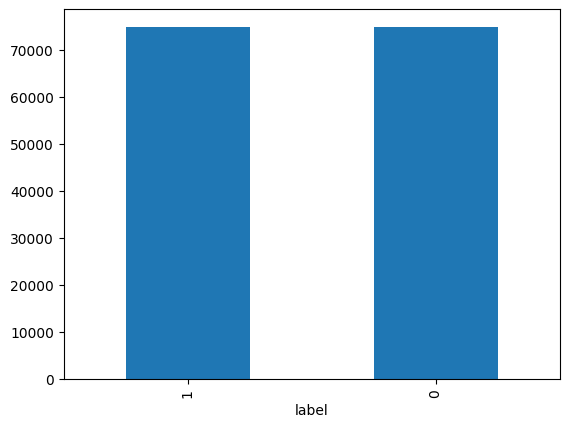

In [ ]:
data['label'].value_counts().plot(kind='bar')

Creating a pie chart for the label i got

Text(0.5, 1.0, 'label distribution')

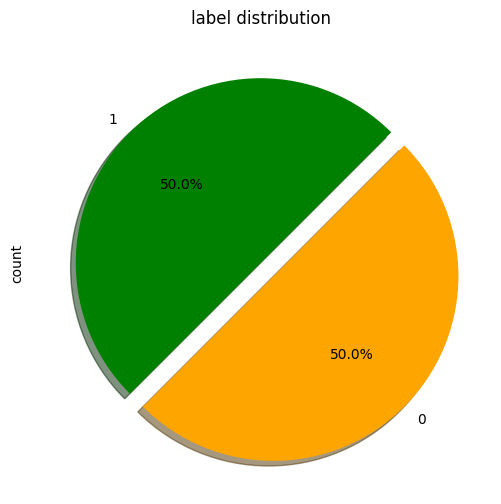

In [ ]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')


the code is trying to extract the value at the 999th position within the  column

visualizing the negetive and positive words,it counts frequents word of each category

In [ ]:
data['Text'][999]

'Loved seeing all the people downtown this morning for dam to dam &amp; the farmers market.  '

In [ ]:
print(data.columns)

Index(['label', 'Text', 'Cleaned_Text_POS', 'Cleaned_Text'], dtype='object')


# Random Forest Classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming 'data' is your DataFrame and it's already defined

# Step 1: Print the column names to check for the correct naming
print("DataFrame columns:", data.columns)

# Step 2: Check for NaN values in the 'Text' column
print("Missing values in 'Text' column:", data['Text'].isna().sum())

# Step 3: Handle NaN values (Option 1: Drop rows with NaN values)
data = data.dropna(subset=['Text', 'label'])  # Use the correct column name without spaces

# Option 2: Fill NaN values with a placeholder (e.g., empty string)
# data['Text'] = data['Text'].fillna('')

# Step 4: Convert the text data into numerical features
vectorizer = CountVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
X = vectorizer.fit_transform(data['Text'])

# Step 5: Extract the label values
y = data['label'].values  # Ensure the column name is correct

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


DataFrame columns: Index(['label', 'Text', 'Cleaned_Text_POS', 'Cleaned_Text'], dtype='object')
Missing values in 'Text' column: 0
Accuracy: 0.88
